# Food_Hub_Data_Analysis

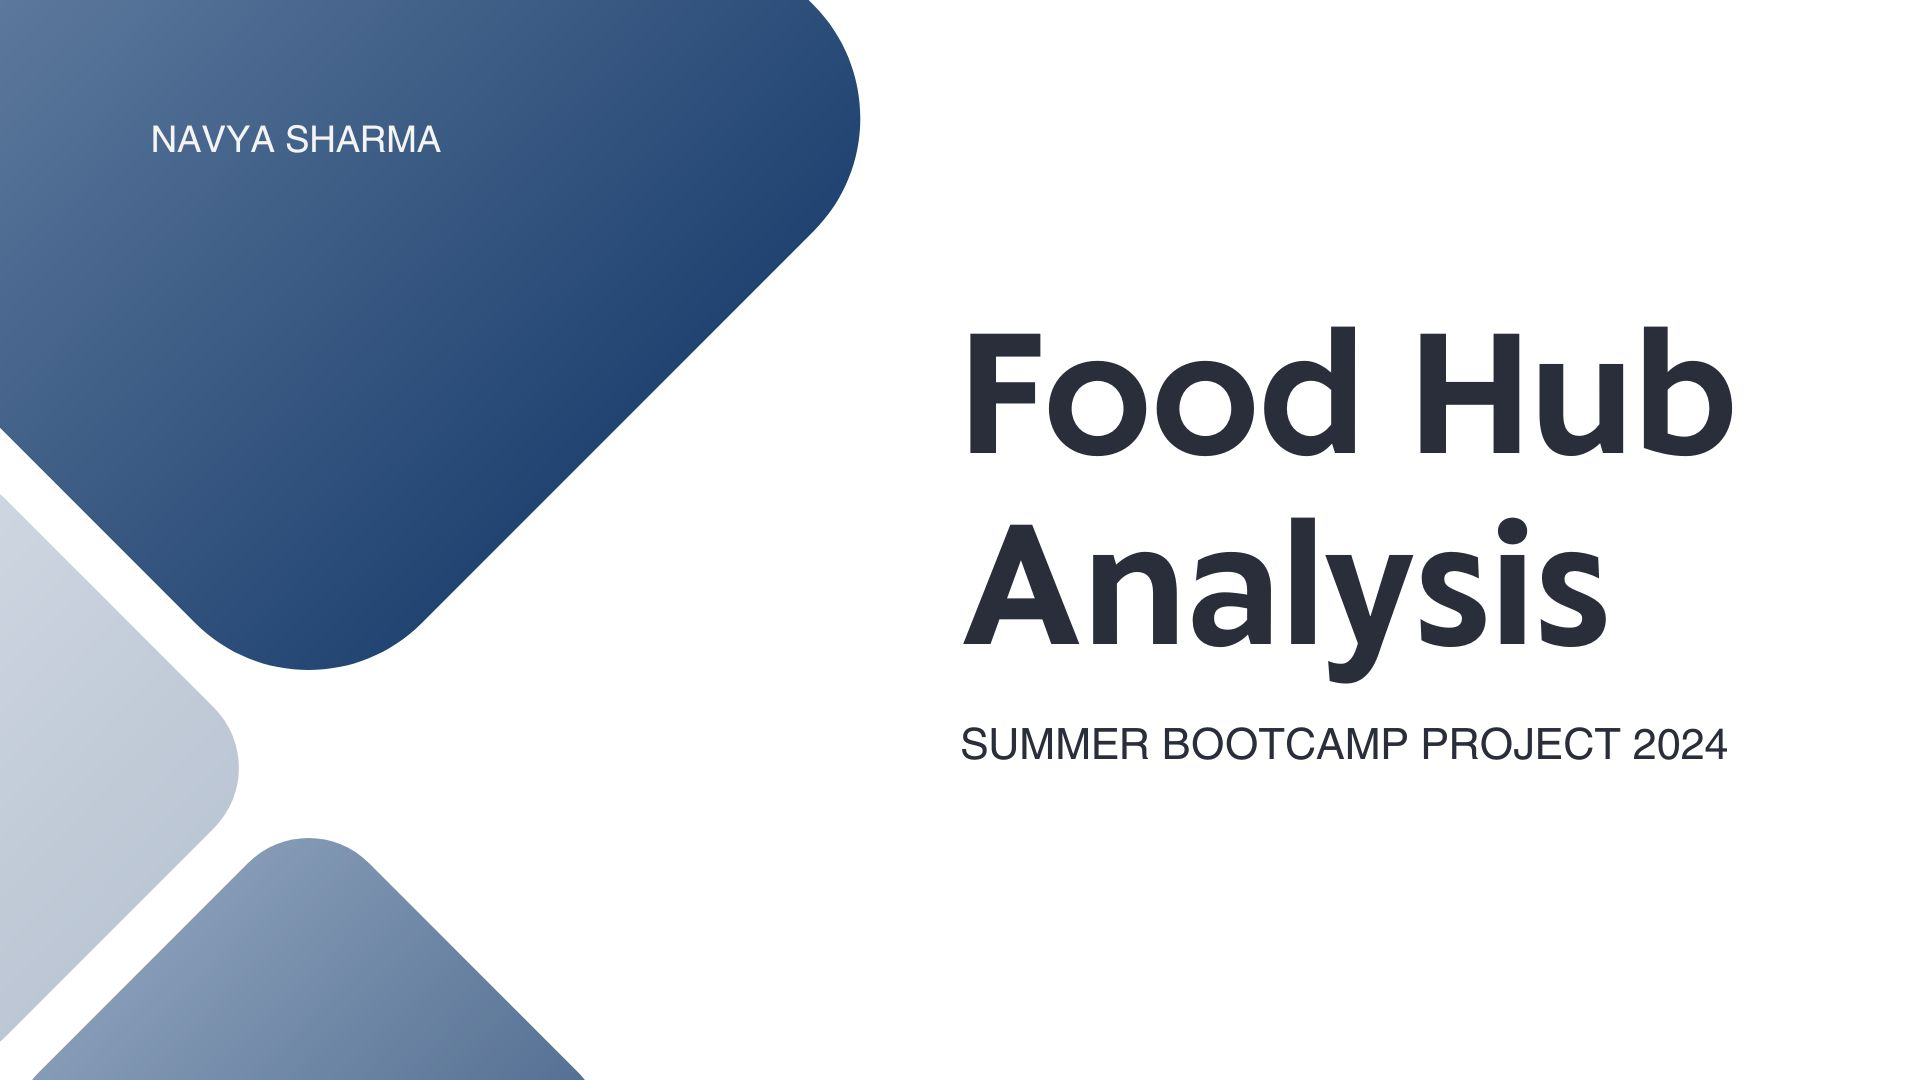

## index

## list of tables

## list of figures

## Problem Statement/ Objective
###
 **The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.**
 
###
### Data description
###
### The data contains the different data related to a food order. The detailed data dictionary is given below.
###
#### Data Dictionary
- order_id: Unique ID of the order
- customer_id: ID of the customer who ordered the food
- restaurant_name: Name of the restaurant
- cuisine_type: Cuisine ordered by the customer
- cost: Cost of the order
- day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
- rating: Rating given by the customer out of 5
- food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
- delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information


## Loading  the necessary libraries.

In [23]:
import pandas as pd #importing pandas library to read datasets.
import numpy as np #importing numpy to deal with numerical datatype.
import matplotlib.pyplot as plt #importing this will help us visualize our datasets.
import seaborn as sns #importing sns to visualize it in better way.

In [51]:
#Reading the datasets using pandas Library
df=pd.read_csv("2-foodhub_order_New.csv")

**1. Display the top 5 rows.**

In [52]:
df.head() #Displaying the top 5 rows.

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24


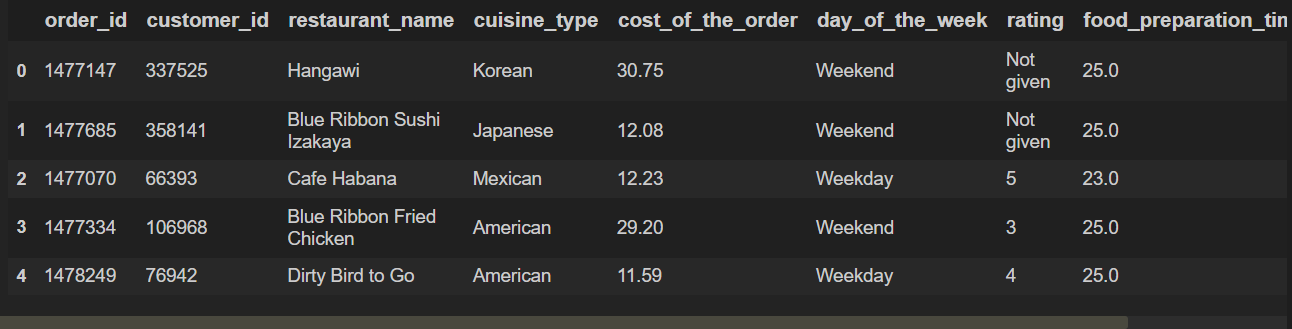

* **Based on the above result we can observe that the following columns of 'rating' and 'delivery_time' have some missing values as:**

* **rating** have values as **'Not given'** whish needs to be checked.
* **delivery_time** have values as **'?'**.

**2. Display the last 5 rows.**

In [53]:
df.tail() #Displaying the last 5 rows.

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31.0,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31.0,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31.0,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23.0,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28.0,24


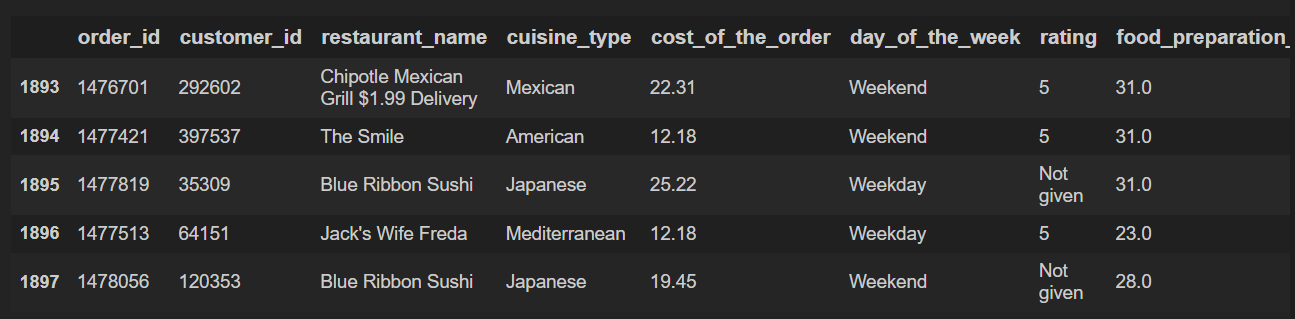

* **Based on the above result we can say that the following column of 'resturant_name' and rating have some incorrect and missing values as:**

* **rating** have the missing values represented as **'Not given'** 

* **restaurant_name** can have the incorrect value on index 1893 as **Chipotle Mexican Grill** **$1.99** **Delivery**  as it contains some numerical value and strings both in single value which may be inappropriate as a name.

**3. Check the shape of dataset.**

In [54]:
df.shape #Checking the shape of datasets.

(1898, 9)

* It shows that our dataset have **1898 rows** and **9 columns**.

**4. Check the datatypes of each feature.**

In [55]:
df.info() #Checking the datatype of each feature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1895 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1896 non-null   float64
 8   delivery_time          1898 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


**The datasets have following types of data in given column**
* **1. order_id have integer type of data but its ordinal do it's ok similarly..**
* **2. customer_id have integer type of data.**
* **3. restaurant_name have object type of data (user-defined).**
* **4. cuisine_type have object type of data.**
* **5. cost_of_the_order have float type of data (decimal).**
* **6. day_of_the_week have object type of data.**
* **7. rating have the object type of data, which indicates that there are some string values in rating column which can disturb our data analysis.**
* **8. food_preparation_time have float (decimal) type of data.**
* **9. delivery_time have object type of data but it should be having numerical type of data as there is no need for string values in delivery_time.**

**5. Check the Statistical summary.**

In [56]:
df.describe() #Checking the statistical summary of given datasets only numerical columns.

,order_id,customer_id,cost_of_the_order,food_preparation_time
count,1.898000e+03,1898.000000,1898.000000,1896.000000
mean,1.477496e+06,171168.478398,80.722007,27.371835
std,5.480497e+02,113698.139743,2798.141333,4.634211
min,1.476547e+06,1311.000000,0.000000,20.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000
50%,1.477496e+06,128600.000000,14.160000,27.000000
75%,1.477970e+06,270525.000000,22.310000,31.000000
max,1.478444e+06,405334.000000,121920.000000,35.000000


**Results of checking the statistical summary is:**
* **customer_id** have count of the **1898**,average of **80.722007**,Standard Deviation of **113698.139743**,minimum of **1311**,25 percentile of **77787.75**,50 percentile of **128600**,75 percentile of **270525**,maximum of **405334**.

* **cost_of_the_order** have count of the **1898**,average of **80.722007**,Standard Deviation of **2798.141333**,minimum of **0**,25 percent of **12.08**,50 percent of **14.16**,75 percent of **22.31**,maximum of **121920**.

* **food_preparation_time** have count of the **1896**,average of **27.371835**,Standard Deviation of **4.634211**,minimum of **20**,25 percent of **23**,50 percent of **27**,75 percent of **31**,maximum of **35**.

* Based on the above observation we found that there is a outlier in **'cost_of_order'** as its min being **0** which is not possible there must be some price of a food.

**6. Check the null values.**

In [57]:
df.isnull().sum() #Checking number of null values in each column.

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             3
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    2
delivery_time            0
dtype: int64

In [58]:
df['rating'] = df['rating'].astype(str).str.strip()
df['rating'] = df['rating'].replace('Not given', np.nan)
# df['delivery_time'] = df['delivery_time'].astype(str).str.strip()
df['delivery_time'] = df['delivery_time'].replace('?', np.nan)

In [59]:
df.shape

(1898, 9)

In [60]:
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')
mean_val = df['delivery_time'].mean()
df['delivery_time'] = df['delivery_time'].fillna(mean_val)
mode_val = df['rating'].mode()
df['rating'] = df['rating'].fillna(int(mode_val))

In [61]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,5,25.0,20.000000
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,5,25.0,24.162447
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28.000000
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15.000000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24.000000


In [62]:
df.shape

(1898, 9)

**In the given dataset we have null values in following columns only:**
* **cuisine_type** have **3** missing values.
* **food_preparation_time** have **2** missing values.

**7. Check the duplicate values**

In [63]:
df.duplicated().sum() #counting  the number of True values, which corresponds to the number of duplicate rows, if there exist any.

0

**In the given dataset there are 0 duplicate values.**

**8. Check the anomalies or wrong entries.**

* **We will use IQR(Interquartile Range) for detecting outlier in our dataset.**

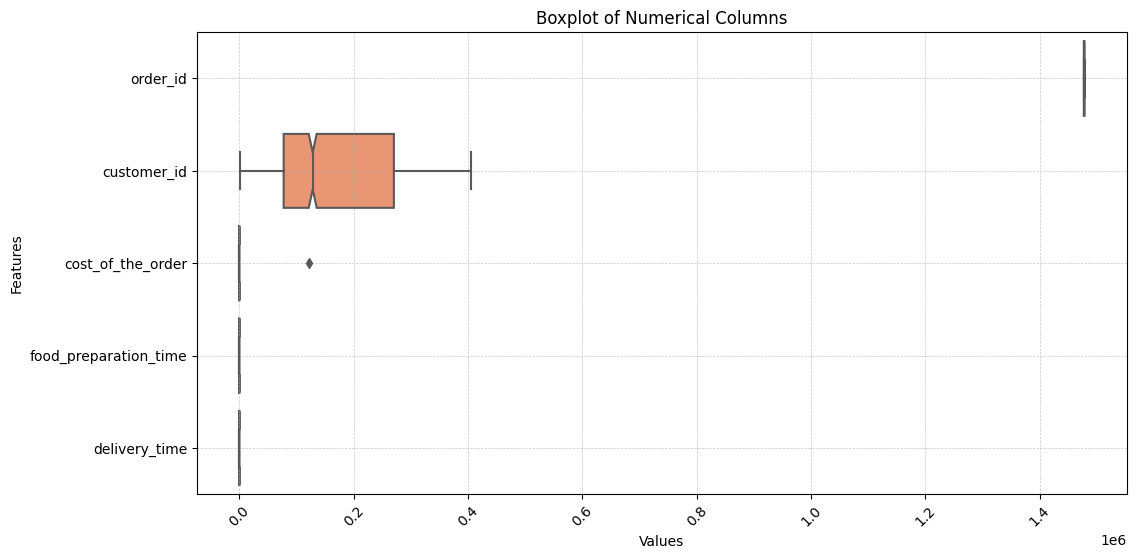

Outliers detected using IQR method:
order_id                 0
customer_id              0
cost_of_the_order        1
food_preparation_time    0
delivery_time            0
dtype: int64


In [64]:
# Define a function to detect outliers using IQR
def detect_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df < lower_bound) | (df > upper_bound)
    return outliers

# Identify outliers in numerical columns using IQR
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
outliers_iqr = df[numerical_columns].apply(detect_iqr)

# Set up the plot
plt.figure(figsize=(12, 6))

# Create the boxplot
sns.boxplot(data=df[numerical_columns], orient='h', notch=True, palette='Set2')

# Add title and labels
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Values')
plt.ylabel('Features')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better visualization of values
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()

# Display the outliers found using IQR
print("Outliers detected using IQR method:")
print(outliers_iqr.sum())


**The detected outliers for the following columns are:**

* **order_id** have **0** outlier.
* **customer_id** have **0** outlier.
* **cost_of_the_order** have **1** outlier.
* **food_preparation_time** have **0** outlier.

**9. Checking the outliers and thier authenticity**

* **delivery_time** have object type of data so we need to convert it to **float** type to correctly analyse the data(which we have done)

* **customer_id** have integer type of data which is useless in real life we don't need mathematical calculation on this values so it can be converted to **object** type of data if needed.

**10. Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.**

**i. Dropping the duplicate values in case if there is any.** 
* There are 0 dupliccate values.

**ii. Unecessary columns**
* All the columns are required in this datasets.

**iii. Null Value imputation** 

* **delivery_time** have value as **'?'** on two indexes **1** and **180**.

* Here we can see that the there are many unique values in this column but '?' makes it a object type so we will replace it with nan and the with mean.

* **We will fill null values with median here so that it won't affect our datasets.**

In [65]:
df[df['cuisine_type'].isnull()] #checking the indexes of nan values in the datasets.

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
11,1478437,221206,Empanada Mama (closed),NaN,8.10,Weekend,5,23.0,22.0
51,1477883,91817,Blue Ribbon Fried Chicken,NaN,29.39,Weekend,5,27.0,28.0
95,1477027,164016,Blue Ribbon Fried Chicken,NaN,16.39,Weekend,5,27.0,22.0


In [66]:
df['cuisine_type'].fillna(df['cuisine_type'].mode()[0], inplace=True)

In [67]:
df[df['food_preparation_time'].isnull()]  #checking the indexes of nan values in the datasets.

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
140,1477376,370372,Blue Ribbon Fried Chicken,American,11.59,Weekday,5,NaN,24.0
188,1477872,300670,Shake Shack,American,13.39,Weekend,5,NaN,22.0


In [68]:
df['food_preparation_time'].fillna(df['food_preparation_time'].mean(), inplace=True)

In [69]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

* Based on the above operations we can now see that the this datasets have **0** **null-values**.

* For outliers we have one in **'cost_of_the_order'** and we will replace it with mean.

In [70]:
# Calculate the mean of the column excluding the zero values
mean_value = df['cost_of_the_order'][df['cost_of_the_order'] != 0].mean()

# Replace '0' values with the calculated mean value
df['cost_of_the_order'] = df['cost_of_the_order'].replace(0, mean_value)

In [71]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

## 1. Order Analysis

**i. What is the total number of orders in the dataset?** 

In [72]:
df['order_id'].count()

1898

* Total numbers of **orders** in the dataset is **1898**.

**ii. What is the average cost of an order?** 

In [73]:
df['cost_of_the_order'].mean()

80.7645598313126

* Average cost of an **order** according to dataset is **80.7645598313126**

**iii. How many unique customers have placed orders?** 

In [74]:
df['customer_id']=df['customer_id'].astype('object')

In [75]:
df['customer_id'].nunique()

1200

* **1200** unique **customers** have placed orders.

**iv. Which restaurant has received the highest number of orders?**

In [76]:
most_ordered_res=df['restaurant_name'].value_counts().idxmax() #it will return the restaurant name which has maximum entries in data
most_ordered_res

'Shake Shack'

* **Shake Shack** is the restaurant which have recieved highest number of orders.

## 2. Customer Behavior

**i. What is the average rating given by customers?**

In [78]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

* We already converted **'rating'** into **numeric** data type for further analysis.

In [79]:
df['rating'].mean() #calculating mean of rating column.

4.598524762908324

* Average **rating** given by customers is **4.598524762908324**.

**ii. How does the rating vary between weekdays and weekends?**

In [88]:
rating_by_day = df.groupby('day_of_the_week')['rating'].mean()
print(rating_by_day)

day_of_the_week
Weekday    4.570384
Weekend    4.609919
Name: rating, dtype: float64


**It can be seen that on both weekdays and weekdays the average rating is 4.57 and 4.60 which means there is not much difference**

**iii. Which cuisine type is ordered the most?**

In [89]:
most_ordered_cuisine=df['cuisine_type'].value_counts().idxmax()
most_ordered_cuisine

'American'

* Most ordered **'cuisine_type'** is **American**. 

**iv. What is the distribution of orders across different days of the week?**

In [90]:
distribution_of_order_day_by_day=df['day_of_the_week'].value_counts()
distribution_of_order_day_by_day

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

* We have **1351** orders **distributed** on **Weekend**.
* We have **547** orders **distributed** on **Weekday**.

## 3. Restaurant Performance 

**i. What is the average food preparation time for each restaurant?**

In [91]:
# Calculating the average food preaparation time for eacg restaurant.
avg_food_prep_time_by_each_restaurant=df.groupby('restaurant_name')['food_preparation_time'].mean()
avg_food_prep_time_df=avg_food_prep_time_by_each_restaurant.reset_index() 

pd.set_option('display.max_rows', None)
avg_food_prep_time_df

,restaurant_name,food_preparation_time
0,'wichcraft,28.000000
1,12 Chairs,27.000000
2,5 Napkin Burger,30.200000
3,67 Burger,20.000000
4,Alidoro,34.000000
5,Amma,26.250000
6,Amy Ruth's,28.666667
7,Anjappar Chettinad,21.000000
8,Asuka Sushi,26.000000
9,Aurora,30.500000


**Average food_time_preparation for each restaurants are as follows:**

* **Haru Gramercy** Park has received an **average** of **20 minutes** .
* **67 Burger** has also received an **average** of **20 minutes**.
* **Frank Restaurant** has received an **average** of **20 minutes**.
* **Despaña** has received an **average** of **20.5 minutes**.
* **Sarabeth’s** West has received an average of 21 minutes.
* **Lucky Strike** has received an average of 21 minutes.
* **Song Thai Restaurant & Bar** has received an average of 21 minutes.
* **Hampton Chutney Co.** has received an average of 21 minutes.
* **Samurai Mama** has received an average of 21 minutes.
* **Market Table** has received an average of 21 minutes.
* **Anjappar Chettinad** has received an average of 21 minutes.
* **Go! Go! Curry!** has received an average of 22 minutes.
* **Le Zie 2000 Trattoria** has received an average of 22 minutes.
* **Galli Restaurant** has received an average of 22 minutes.
* **Wo Hop Restaurant** has received an average of 22 minutes.
* **Hangawi** has received an average of 23 minutes.
* **Nha Trang One** has received an average of 23 minutes.
* **Lamarca Pasta** has received an average of 23 minutes.
* **Olea** has received an average of 23 minutes.
* **Socarrat Paella Bar** has received an average of 23 minutes.
* **Posto** has received an average of 23 minutes.
* **Dirty Bird** to Go has received an average of 23.25 minutes.
* **Olive Garden** has received an average of 23.5 minutes.
* **Haveli Indian Restaurant** has received an average of 23.5 minutes.
* **Prosperity Dumpling** has received an average of 23.67 minutes.
* **Sarabeth’s Restaurant** has received an average of 23.71 minutes.
* **Benihana** has received an average of 23.8 minutes.
* **Cho Dang Gol** has received an average of 23.83 minutes.
* **Chote Nawab** has received an average of 24 minutes.
* **Dos Caminos Soho** has received an average of 24 minutes.
* **da Umberto** has received an average of 24.33 minutes.
* **Tarallucci e Vino Restaurant** has received an average of 24.5 minutes.
* **Bistango** has received an average of 24.5 minutes.
* **El Parador Cafe** has received an average of 25 minutes.
* **Emporio** has received an average of 25 minutes.
* **Gaia Italian Cafe** has received an average of 25 minutes.
* **Waverly Diner** has received an average of 25 minutes.
* **brgr** has received an average of 25 minutes.
* **Balade** has received an average of 25 minutes.
* **Junoon** has received an average of 25.2 minutes.
* **Cafe Mogador** has received an average of 25.28 minutes.
* **L’Express** has received an average of 25.33 minutes.
* **Vanessa’s Dumpling House** has received an average of 25.56 minutes.
* **Five Guys Burgers and Fries** has received an average of 25.62 minutes.
* **Westville Hudson** has received an average of 25.67 minutes.
* **Pylos** has received an average of 25.8 minutes.
* **Mamoun’s Falafel**  has received an average of 25.86 minutes.
* **Lucky’s Famous Burgers**  has received an average of 26 minutes.
* **Le Grainne Cafe**  has received an average of 26 minutes.
* **Rye House**  has received an average of 26 minutes.
* **Asuka Sushi**  has received an average of 26 minutes.
* **Yama 49**  has received an average of 26 minutes.
* **Woorijip**  has received an average of 26 minutes.
* **Kori Restaurant and Bar**  has received an average of 26 minutes.
* **Bukhara Grill has received an average of 26 minutes.
* **V-Nam Cafe**  has received an average of 26 minutes.
* **Chipotle Mexican Grill $1.99 Delivery**  has received an average of 26 minutes.
* **Tortaria**  has received an average of 26 minutes.
* **The Smile**  has received an average of 26.11 minutes.
* **Donburi-ya**  has received an average of 26.14 minutes.
* **Amma**  has received an average of 26.25 minutes.
* **Pepe Rosso To Go**  has received an average of 26.29 minutes.
* **Blue Ribbon Sushi Bar & Grill**  has received an average of 26.3 minutes.
* **Dickson’s Farmstand Meats**  has received an average of 26.33 minutes.
* **ilili Restaurant**  has received an average of 26.39 minutes.
* **Café China**  has received an average of 26.5 minutes.
* **Bhatti Indian Grill**  has received an average of 26.5 minutes.
* **Xe May Sandwich Shop**  has received an average of 26.5 minutes.
* **Vanessa’s Dumplings**  has received an average of 26.54 minutes.
* **Empanada Mama (closed)**  has received an average of 26.62 minutes.
* **Terakawa Ramen**  has received an average of 26.67 minutes.
* **Cafe Habana**  has received an average of 26.75 minutes.
* **The Loop**  has received an average of 26.75 minutes.
* **Pinto Nouveau Thai Bistro**  has received an average of 26.75 minutes.
* **TAO**  has received an average of 26.78 minutes.
* **Yama Japanese Restaurant**  has received an average of 26.94 minutes.
* **Tamarind TriBeCa**  has received an average of 26.96 minutes.
* **12 Chairs**  has received an average of 27 minutes.
* **Big Daddy’s**  has received an average of 27 minutes.
* **Moonstruck on Second**  has received an average of 27 minutes.
* **Pongsri Thai**  has received an average of 27 minutes.
* **Vezzo Thin Crust Pizza**  has received an average of 27 minutes.
* **Cafe de La Esquina**  has received an average of 27 minutes.
* **Tres Carnes**  has received an average of 27 minutes.
* **Izakaya Ten**  has received an average of 27 minutes.
* **Haandi**  has received an average of 27 minutes.
* **Dig Inn Seasonal Market**  has received an average of 27 minutes.
* **Blue Ribbon Fried Chicken**  has received an average of 27.16 minutes.
* **RedFarm Hudson**  has received an average of 27.16 minutes.
* **The Meatball Shop**  has received an average of 27.18 minutes.
* **Delicatessen**  has received an average of 27.2 minutes.
* **Blue Ribbon Brooklyn**  has received an average of 27.25 minutes.
* **Momoya**  has received an average of 27.3 minutes.
* **Parm** has received an average of 27.31 minutes.
* **Room Service**  has received an average of 27.33 minutes.
* **Hill Country Fried Chicken**  has received an average of 27.36 minutes.
* **The Kati Roll Company**  has received an average of 27.38 minutes.
* **Bareburger**  has received an average of 27.41 minutes.
* **Han Dynasty**  has received an average of 27.41 minutes.
* **Osteria Morini**  has received an average of 27.43 minutes.
* **Five Leaves**  has received an average of 27.5 minutes.
* **Piccolo Angolo**  has received an average of 27.5 minutes.
* **Burger Joint**  has received an average of 27.5 minutes.
* **Sushi of Gari 46**  has received an average of 27.54 minutes.
* **RedFarm Broadway** has received an average of 27.59 minutes.
* **Serafina Fabulous Pizza**  has received an average of 27.6 minutes.
* **Melt Shop**  has received an average of 27.64 minutes.
* **Jack’s Wife Freda**  has received an average of 27.72 minutes.
* **Joe’s Shanghai** has received an average of 27.75 minutes.
* **Nobu Next Door** has received an average of 27.76 minutes.
* **Shake Shack** has received an average of **27.9** minutes.

**ii. Which restaurant has the shortest average food preparation time?**

In [92]:
avg_food_prep_time_df.min()

restaurant_name          'wichcraft
food_preparation_time          20.0
dtype: object

* Based on above operations we can say that the restaurants having **shortest average food preparation time** is '**wichcraft'** with **20 minutes**.

**iii. How does the average delivery time compare across different restaurants?** 

In [93]:
average_delivery_time= df.groupby('restaurant_name')['delivery_time'].mean().reset_index()

#Sorting the results by average delivery time 
average_delivery_time_sorted=average_delivery_time.sort_values(by='delivery_time')

average_delivery_time_sorted


,restaurant_name,delivery_time
60,Gaia Italian Cafe,15.000000
110,Paul & Jimmy's,15.000000
152,The MasalaWala,15.000000
71,Hibino,15.000000
40,Coppola's East,16.000000
61,Galli Restaurant,16.000000
167,Wo Hop Restaurant,16.000000
96,Market Table,17.000000
28,Byblos Restaurant,18.000000
128,Samurai Mama,18.000000


* **Restaurants with the shortest average delivery times (15 minutes) include Gaia Italian Cafe, Paul & Jimmy's, The MasalaWala, and Hibino. On the other end, Sarabeth's West has the longest average delivery time at 33 minutes**.

**iv. Is there a correlation between the cost of the order and the rating given?**

**Plotting the above results to get a better visualisation**

In [94]:
#Calculate the correlation coefficient between 'cost_of_the_order' and 'rating'
correlation_coefficient = df['cost_of_the_order'].corr(df['rating'])

# Interpret the correlation coefficient
if correlation_coefficient > 0:
    interpretation = "There is a positive correlation."
elif correlation_coefficient < 0:
    interpretation = "There is a negative correlation."
else:
    interpretation = "There is no correlation."

print(f"Correlation coefficient between cost of order and rating: {correlation_coefficient}")
print(f"Interpretation: {interpretation}")

Correlation coefficient between cost of order and rating: -0.055418689178310894
Interpretation: There is a negative correlation.


* **Here we can see that the correlation coefficient of 'cost_of_the_order and 'rating' is** **-0.055418689178310894** **which further shows that the both have strong negative correlation between them.**

## 4. Demand Patterns

**i. How does the demand for different cuisine types vary on weekdays versus weekends?**

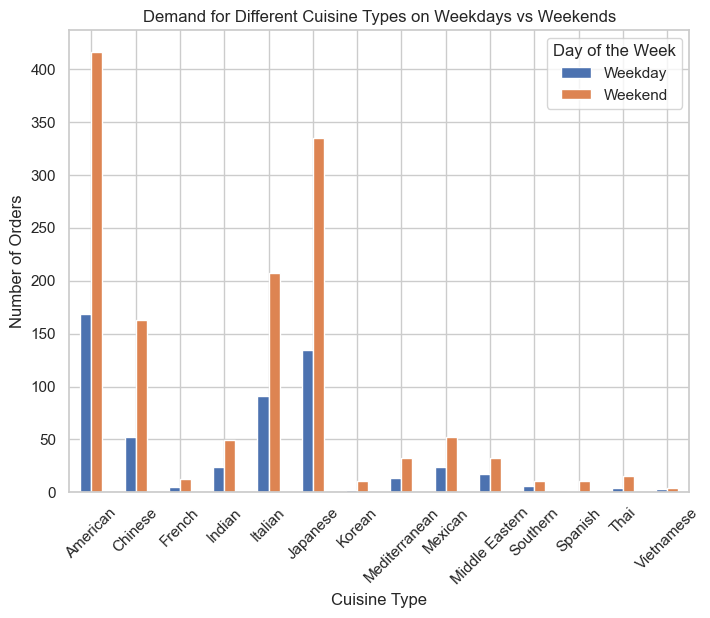

In [95]:
demand_cuisine=df.groupby(['cuisine_type', 'day_of_the_week']).size().reset_index(name='order_count')

#Creating a pivot table for better visualisation.
pivot_demand= demand_cuisine.pivot(index='cuisine_type', columns='day_of_the_week', values='order_count').fillna(0)

#setting the aestgetics for the plots
sns.set(style='whitegrid')

#Creating a bar plot to visualize the demand_cuisine types on Weekdays and Weekends
pivot_demand.plot(kind='bar', figsize=(8,6))

# Setting plot labels and title
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.title('Demand for Different Cuisine Types on Weekdays vs Weekends')

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Day of the Week')
plt.show()


* Based on above results we can say that most ordereder food on **weekday** is **American**, **italian**, **japanese**, following **chinese**.

* Most ordered food on **weekend** is **American**, **Japenese**, **Italian**, **Chinese**.

* **Japenese** was ordered more than **Italian** on **weekend**.

**ii. Which day of the week has the highest average order cost?**

In [96]:
#calculating the average order cost for each day of the week.
average_order_cost_by_day=df.groupby('day_of_the_week')['cost_of_the_order'].mean()

#Find the day with the highest avergae order cost
highest_avg_order_cost_day= average_order_cost_by_day.idxmax()
highest_avg_order_cost=average_order_cost_by_day.max()

print(f"The day with the highest average order cost is {highest_avg_order_cost_day} with an average cost of {highest_avg_order_cost:.2f}")


The day with the highest average order cost is Weekend with an average cost of 106.86


* On **weekend** rstaurant have recived **highest average order cost** of **106.86**.

**iii.What is the most common day for orders to be placed?**

In [97]:
# Counting the occurences of each day of the week.
most_common_day=df['day_of_the_week'].value_counts().idxmax()
num_orders_most_common_day=df['day_of_the_week'].value_counts().max()

print(f"The most common day for orders to be placed is {most_common_day} with {num_orders_most_common_day} orders.")

The most common day for orders to be placed is Weekend with 1351 orders.


**The most common day for orders to be placed is Weekend with 1351 orders.**

**iv.How does the average rating vary by cuisine type?** 

In [98]:
#Calculating the average rating vary by cuisine type.
average_rating_cuisine=df.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False)

average_rating_cuisine

cuisine_type
Spanish           4.916667
Thai              4.842105
Indian            4.684932
Japanese          4.636170
Mexican           4.631579
Italian           4.630872
French            4.611111
Chinese           4.590698
American          4.558974
Southern          4.470588
Middle Eastern    4.469388
Mediterranean     4.456522
Korean            4.384615
Vietnamese        4.285714
Name: rating, dtype: float64

**Average rating vary by cuisne type are as follows:**
* **Spanish**  have rating of **4.916667**
* **Thai** have rating of **4.842105**
* **Indian** have rating of **4.684932**
* **Japanese** have rating of **4.636170**
* **Mexican** have rating of **4.631579**
* **Italian** have rating of **4.630872**
* **French** have rating of **4.611111**
* **Chinese** have rating of **4.590698**
* **American** have rating of **4.558974**
* **Southern** have rating of **4.470588**
* **Middle Eastern** have rating of **4.469388**
* **Mediterranean** have rating of **4.456522**
* **Korean** have rating of **4.384615**
* **Vietnamese** have rating of **4.285714**


## 5. Operational Efficiency

**i. What is the average delivery time for all orders?** 

In [99]:
average_delivery_time=df['delivery_time'].mean()
print(f"The average delivery time for all orders is {average_delivery_time:.2f} minutes.")

The average delivery time for all orders is 24.16 minutes.


* The average **delivery time** taken for all orders is **24.16 minutes**.

**ii. Which restaurant has the longest average delivery time?**

In [100]:
#Calculating the average delivery time by restaurant.
average_delivery_time_by_restaurant=df.groupby('restaurant_name')['delivery_time'].mean()

#Finding the resttaurants with largest average delivery time
longest_avg_delivery_time_res=average_delivery_time_by_restaurant.idxmax()
longest_avg_delivery_time=average_delivery_time_by_restaurant.max()
longest_avg_delivery_time_res, longest_avg_delivery_time

("Sarabeth's West", 33.0)

* Restaurant having longest average delivery time is **'Sarabeths's West'** with **33 minutes** of average delivery time.

**iii.Is there a relationship between food preparation time and delivery time?** 

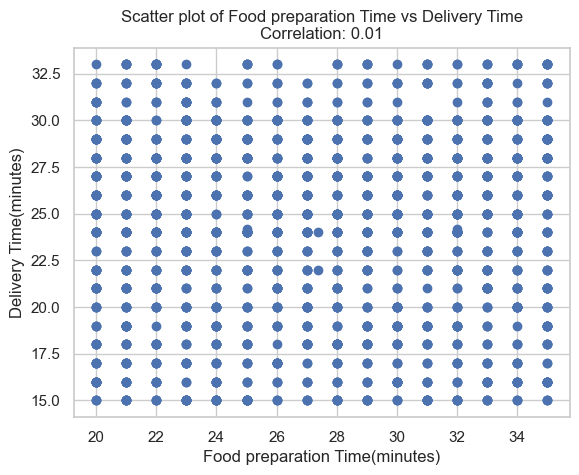

The correlation between food preparation time and delivery time is 0.01.


In [101]:
#Calculating the correlation between food preparation and delivery time.
correlation=df[['food_preparation_time', 'delivery_time']].corr().iloc[0,1]

#Creatiing a scatter plot
plt.scatter(df['food_preparation_time'], df['delivery_time'])
plt.xlabel('Food preparation Time(minutes)')
plt.ylabel('Delivery Time(minutes)')
plt.title(f'Scatter plot of Food preparation Time vs Delivery Time\nCorrelation: {correlation:.2f}')
plt.grid(True)
plt.show()

print(f"The correlation between food preparation time and delivery time is {correlation:.2f}.")

* From abbove results we can  observe that **correlation coefficient** between **food_preparation_time** and **delivery_time** is **0.01**.

* This shows that there is a **neglible correlation** between the data.

**iv. How does the delivery time impact customer ratings?**

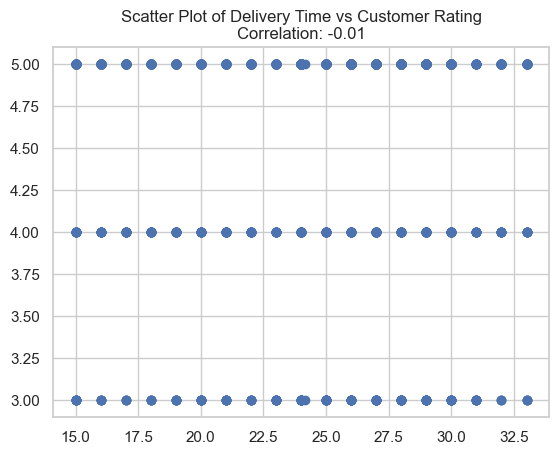

In [102]:
# Calculate the correlation between delivery time and customer ratings
correlation=df[['delivery_time', 'rating']].corr().iloc[0,1]

#creating a scatter plot again to visualise the data
plt.scatter(df['delivery_time'], df['rating'])
plt.xlabel=('Delivery Time (minutes)')
plt.ylabel=('Customer Rating')
plt.title(f'Scatter Plot of Delivery Time vs Customer Rating\nCorrelation: {correlation:.2f}')
plt.grid(True)
plt.show()     

* It doesn't affect the **customers rating** as correlation between them is **-0.01**. 

* It shows that the **rating** depends on some other parameters.

## 6. Customer Insights

**i.What is the repeat order rate (number of customers who have placed more than one order)?** 

In [103]:
# Counting the number of orders per customer
order_counts=df['customer_id'].value_counts()

# selecting the customers who have placed more than one order
customers_repeat=order_counts[order_counts>1].count()

#Calculating the repeat order rate
total_customers=df['customer_id'].nunique()
customer_repating_order_rate=customers_repeat/total_customers

customer_repating_order_rate

0.3466666666666667

In [104]:
# Counting the number of orders per customer
order_counts=df['customer_id'].value_counts()

# selecting the customers who have placed more than one order
customers_repeat=order_counts[order_counts>1].count()

customers_repeat

416

* **Repeat order** rate is **0.3466666666666667**

* **Number of customers** who have placed more than one order is **416**.

**ii. What percentage of orders receive a rating of 4 or higher?**

In [105]:
#Counting the number of orders with ratings of  4  or higher.
count_of_high_rating=df[df['rating']>=4].shape[0]

#Counting the total number of orders with given ratings (excluding NaN)
total_ratings_count=df['rating'].notna().sum()

#Calculating the percentage of high ratings
percentage_of_high_ratings=(count_of_high_rating/total_ratings_count)*100

percentage_of_high_ratings

90.09483667017913

* The **percentage** of **orders recieving** a **rating** of **4** or higher is **90.09483667017913**.

# Thank You!!